# **Homework 2:** Linear regression and maximum likelihood

In [ ]:
# Run me first!
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In this homework, we will use the following convention for dimentionality:

$N:\quad\text{Number of observations in a dataset, so } \mathcal{D} = \{ (\mathbf{x}_1, y_1),\ (\mathbf{x}_2, y_2),\ ... \,(\mathbf{x}_N, y_N) \}$

$d:\quad\ \text{Dimension of input (number of features), so } \mathbf{x}_i \in \mathbb{R}^d$


## Part 1: Linear regression

Let's begin by reviewing the context of linear regression.



Recall that the linear regression model makes predictions of the following form:

$$f(\mathbf{x})=\mathbf{x}^T\mathbf{w} + b$$

Or if we consdier the augmented representation:

$$\mathbf{x} \rightarrow \begin{bmatrix}\mathbf{x} \\ 1 \end{bmatrix} = \begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_d \\ 1 \end{bmatrix},\quad \mathbf{w} \rightarrow \begin{bmatrix}\mathbf{w} \\ b \end{bmatrix} = \begin{bmatrix}w_1 \\ w_2 \\ \vdots \\ w_d \\ b \end{bmatrix}$$
Then we can use the more convenient linear form:
$$f(\mathbf{x}) = \mathbf{x}^T\mathbf{w}$$


#### **Q1** (5 points)
Write a function that takes in an input $(\mathbf{x})$ and a set of weights $(\mathbf{w})$ and makes a prediction using the function above. **Your implementation should assume that the bias $(b)$ is included in the weights $(\mathbf{w})$ and thus should *augment* the input to account for this (or separate $b$ from $\mathbf{w}$)**.

In [ ]:
# Test inputs
x = np.array([1, -3, 5])
w = np.array([-1, 2, 0.5, 2])
y = -2.5

def linear_regression(x, w):
    ### YOUR CODE HERE
    pass

## Validate the function
assert y == linear_regression(x, w)

As discussed in class, we can compactly refer to an entire *dataset* of inputs and outputs using the notation $\mathbf{X}$ and $\mathbf{y}$ respectively. Our convention will be that *row* $i$ of $\mathbf{X}$ will correspond to the $i^{th}$ observed input $\mathbf{x}_i$, while the corresponding entry $y_i$ of $\mathbf{y}$ is the observed output. In other words $\mathbf{X}$ and $\mathbf{y}$ are defined as:
$$
\mathbf{X} =
\begin{bmatrix} X_{11} & X_{12} & \dots  & X_{1d} & 1 \\
                X_{21} & X_{22} & \dots  & X_{2d} & 1 \\
                \vdots & \vdots & \ddots & \vdots & \vdots \\
                X_{N1} & X_{N2} & \dots  & X_{Nd} & 1 \\  
                \end{bmatrix} = \begin{bmatrix} \mathbf{x}_1^T \\ \mathbf{x}_2^T \\ \vdots \\ \mathbf{x}_N^T \end{bmatrix}, \quad
                \mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix}
$$

With this notation, we can make predictions for an entire set of inputs as:
$$f(\mathbf{X}) = \mathbf{X}\mathbf{w}$$
Where the output is now a *vector* of predictions. We see that each entry corresponds to the prediction for input $\mathbf{x}_i$:
 $$f(\mathbf{X})_i = \mathbf{x}_i^T\mathbf{w} = f(\mathbf{x}_i)$$

#### **Q2** (10 points)
Modify (if needed) your linear regression prediction function to accept a set of inputs *as a matrix* as described above and return a vector of predictions. Once again you should *not* assume the data includes the extra bias dimension. Then plot the prediction function given by the provided weights on the range $[0, 5]$. *Recall that `np.linspace(a, b, n)` produces a vector of `n` equally spaced numbers between `a` and `b`.*

In [ ]:
# Test inputs
w = np.array([0.5, 2])

def linear_regression(x, w):
    ### YOUR CODE HERE
    pass

## CODE TO PLOT THE FUNCTION HERE
X =
y = linear_regression(X, w)



Recall that *ordinary least squares* finds the parameter $\mathbf{w}$ that minimizes the *mean of squared error* between the true outputs $\mathbf{y}$ and predictions.
$$\underset{\mathbf{w}}{\text{argmin}} \frac{1}{N} \sum_{i=1}^N \left(\mathbf{x}_i^T\mathbf{w} - y_i\right)^2$$

Observe that this is the same formula as the error we used for evaluating Richardson iteration in the last homework, we've simply renamed the variables from $(\mathbf{A}, \mathbf{x}, \mathbf{b})$ to $(\mathbf{X}, \mathbf{w}, \mathbf{y})$! *(We've also added the constant $\frac{1}{N}$, but this doesn't change the optimal $\mathbf{w}$)*

We've now seen 3 equivalent ways to write the same formula. From most compact to least compact these are:
$$\textbf{1: } \frac{1}{N} \|\mathbf{X}\mathbf{w} - \mathbf{y}\|_2^2 \quad \textbf{2: } \frac{1}{N} \sum_{i=1}^N \left(\mathbf{x}_i^T\mathbf{w} - y_i\right)^2 \quad \textbf{3: } \frac{1}{N} \sum_{i=1}^n \left(\sum_{j=1}^n X_{ij}w_j - y_i\right)^2$$

#### **Q3** (10 points)
Using the gradient formula we derived in class, write a function that returns both the mean squared error *and* the gradient of the error with respect to $\mathbf{w}$, given $\mathbf{w}$, $\mathbf{X}$ and $\mathbf{y}$.

As you write each line of code, mark it with a comment specifying what shape you expect the output to be. For example:

In [ ]:
A = np.zeros_like(X) # N x d 

b = np.sum(A, axis=1)     # N
A_AT = np.dot(A, A.T)     # N x N
result = np.dot(A_AT, b)  # N
assert result.shape == (A.shape[0],)

This will help you debug. If your code is not working as expected, try printing the shape of each intermediate array and verify that it matches your expectations.

 *Hint: don't forget to augment X when computing the gradient!*

In [ ]:
def mse_and_grad(w, X, y):
    ### YOUR CODE HERE
    return mse, grad_w

Recall that we can use the *gradient descent* algorithm to find the input that minimizes a function, using the corresponding gradient function.

Given an initial guess of the optimal input, $\mathbf{w}^{(0)}$, gradient descent uses the following update to improve the guess:
$$\mathbf{w}^{(i+1)} \longleftarrow \mathbf{w}^{(i)} - \alpha \nabla f(\mathbf{w}),$$
where $\alpha$ is the *learning rate* or *step size*.

#### **Q4** (10 points)
Write a function to perform gradient descent. The function should take as input:
- `value_and_grad`: A function that produces the output and gradient of the function to optimize (e.g. the `mse_and_grad`)
- `w0`: An inital guess $\mathbf{w}^{(0)}$
- `lr`: The learning rate $(\alpha)$
- `niter`: The number of updates to perform
- `*args`: Any additional argumets to pass to `value_and_grad` (e.g. `X` and `y`)

The function should return:
- `w`: The final guess
- `losses`: A list (or array) that tracks the value of the function at each update

In [ ]:
def gradient_descent(value_and_grad, w0, lr, niter, *args):
    # Get the inital loss
    initial_loss, _ = value_and_grad(w0, *args)
    losses = []

    ### YOUR CODE HERE

    return w, losses

## Part 2: Applications to real data

Now that we've setup a full implementation of linear regression, let's test it on a real dataset. We'll use the MPG dataset that we saw in class. The following code will load the data and rescale it.

In [ ]:
data = np.genfromtxt('auto-mpg.csv', delimiter=',', missing_values=['?'], filling_values=[0])
# Uncomment if on Colab!
# import urllib.request
# link = 'https://gist.githubusercontent.com/gabehope/4df286bbd9a672ce7731d52afe3ca07e/raw/65026711d71affaafb9713ddf5b6ef29125ba0fb/auto.csv'
# data = np.genfromtxt(urllib.request.urlopen(link), delimiter=',', missing_values=['?'], filling_values=[0])

# MPG is the output value
target = 'MPG'
y = data[:, 0]

# The other variables are inputs in the order listed
features = ['displacement', 'weight', 'acceleration', 'year']
X = data[:, [2, 4, 5, 6]]
X = (X - X.mean(axis=0)) / X.std(axis=0)

Let's start by fitting a model that just uses the feature `weight`.

#### **Q5** (5 points)
Use the `gradient_descent` and `mse_and_grad` functions you wrote above to fit a linear regression model that takes in a car's weight and predicts its MPG rating. Start with the weights equal to `0` and perform `100` updates of gradient descent with a learning rate of `0.1`. Plot the loss (MSE) as a function of the number of updates.

In [ ]:
Xweight = X[:, 1:2]
w0 = np.zeros((2,))

### YOUR CODE HERE
w, losses =

### PLOTTING CODE HERE
plt.figure(figsize=(6, 4))

#### **Q6** (5 points)
Plot a scatterplot of weight vs. MPG. Then on the same plot, plot the prediction function for the linear regression model you just fit on the input range $[-3, 3]$.

In [ ]:
### PLOTTING CODE HERE
plt.figure(figsize=(6, 4))

#### **Q7** (5 points)
Repeat **Q5** using all 4 features and compare the final loss to the final loss using only `weight` as an input. Describe any differences you observe.

In [ ]:
w0 = np.zeros((5,))

### YOUR CODE HERE
w, losses =

### PLOTTING CODE HERE
plt.figure(figsize=(6, 4))

**DESCRIBE RESULTS HERE**

In machine learning we are typically less interested in how our model predicts the data we've already seen than we are in how well it makes predictions for *new* data. One way to estimate how well our model our model will generalize to new data is to *hold out* data while fitting our model. To do this we will split our dataset into two smaller datasets: a *training dataset* that we will use to fit our model, and a *test* or *held-out* dataset that we will only use to evaluate our model. By computing the loss on this test dataset, we can get a sense of how well our model will make prediction for new data.

$$\mathcal{D} = \{ (\mathbf{x}_1, y_1),\ (\mathbf{x}_2, y_2),\ ... \,(\mathbf{x}_N, y_N) \}\quad \longrightarrow \quad
\mathcal{D}_{train} = \{ (\mathbf{x}_1, y_1),\ (\mathbf{x}_2, y_2),\ ... \,(\mathbf{x}_{Ntrain}, y_{Ntrain}) \},\  
\mathcal{D}_{test} = \{ (\mathbf{x}_1, y_1),\ (\mathbf{x}_2, y_2),\ ... \,(\mathbf{x}_{Ntest}, y_{Ntest}) \}
$$

#### **Q8** (5 points)
Split the MPG dataset into *training* and *test* datasets. Use 70\% of the observations for training and 30\% for test. Then repeat **Q5** to fit a linear regression model on *just the training dataset* using only the `weight` feature (you don't need to plot the loss for this question). Report the final loss (MSE) on the training dataset and on the test dataset.

In [ ]:
### CODE TO SPLIT DATASET HERE
Xweight_train =
y_train =

Xweight_test =
y_test =

### CODE TO FIT MODEL HERE
w0 = np.zeros((2,))
w, losses =

### CODE TO EVALUATE MODEL HERE
mse_train =
mse_test =

print('Loss on training data: %.4f, loss on test data: %.4f' % (mse_train, mse_test))

#### **Q9** (5 points)
Repeat **Q8** using the all 4 features. Compare the results to the model using only `weight`.

In [ ]:
### CODE TO SPLIT DATASET HERE
X_train =
y_train =

X_test =
y_test =

### CODE TO FIT MODEL HERE
w0 = np.zeros((5,))
w, losses =

### CODE TO EVALUATE MODEL HERE
mse_train =
mse_test =

print('Loss on training data: %.4f, loss on test data: %.4f' % (mse_train, mse_test))

**DESCRIBE RESULTS HERE**

## Part 3: Maximum Likelihood Training

### Background:
We saw in lecture that we can view linear regression as the following probibalistic model:
$$
y_i \sim \mathcal{N}\big(\mathbf{x}_i^T \mathbf{w},\ \sigma^2\big)
$$
Where $\mathcal{N}(\mu, \sigma)$ is the *Normal distribution*, which has the following probability density function:
$$
p(y\mid \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} \text{exp}\bigg(-\frac{1}{2\sigma^2} (y -\mu)^2\bigg)
$$
We saw that a reasonable way to choose the optimal $\mathbf{w}$ is to *maximize the likelihood* of our observed dataset, which is equivalent to *minimizing the negative log likelihood*:
$$\underset{\mathbf{w}}{\text{argmax}} \prod_{i=1}^N p(y_i\mid \mathbf{x}_i, \mathbf{w}, \sigma) =
\underset{\mathbf{w}}{\text{argmin}} -\sum_{i=1}^N \log p(y_i\mid \mathbf{x}_i, \mathbf{w}, \sigma) = \underset{\mathbf{w}}{\text{argmin}}\ \frac{1}{2\sigma^2}\sum_{i=1}^N  (y_i -\mathbf{x}_i^T\mathbf{w})^2 + C
$$
Where $C$ is a constant: $C = N \log \sigma \sqrt{2\pi}$. We further saw that this is equivalent to minimizing the *mean squared error* for any choice of $\sigma$.

### Laplace Maximum Likelihood Estimation

A natural question about the above model is: why choose the Normal distribution? In principal, we could define a linear model using *any* distribution over the real numbers $\mathbb{R}$. Let's explore an alternative choice: the *Laplace distribution* ([Wiki](https://en.wikipedia.org/wiki/Laplace_distribution)). The Laplace distribution $L(\mu, a)$ has the following PDF:

$$p(y\mid \mu, a) = \frac{1}{2a} \exp\bigg(- \frac{|y-\mu|}{a} \bigg) $$

As for the normal distribution $\mu$ is the mean, while $a$ defines the "width" of the distribution (analogous to variance for the Normal). We can compare the two distributions visually:

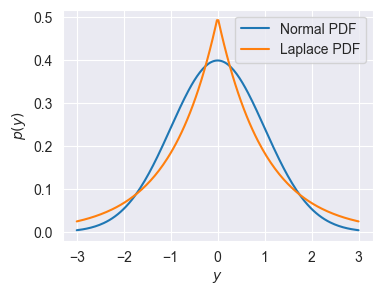

In [ ]:
ylp = np.linspace(-3, 3, 200)
mu, sigma2_or_a = 0, 1
p_y_normal = (1 / np.sqrt(sigma2_or_a * 2 * np.pi)) * np.exp(- (0.5 / sigma2_or_a) * (ylp - mu) ** 2)
p_y_laplace = (1 / (2 * sigma2_or_a)) * np.exp(- (1 / sigma2_or_a) * np.abs(ylp - mu))

plt.figure(figsize=(4,3))
plt.plot(ylp, p_y_normal, label=r"Normal PDF")
plt.plot(ylp, p_y_laplace, label=r"Laplace PDF")
plt.xlabel('$y$')
plt.ylabel('$p(y)$')
plt.legend()
pass

Let's now consider the Laplace version of our probabilistic linear model:
$$
y_i \sim L\big(\mathbf{x}_i^T \mathbf{w},\ a\big)
$$
Recall that the negative log-likelihood is defined as:
$$\mathbf{NLL}(\mathbf{w}, a, \mathbf{X}, \mathbf{y}) = -\sum_{i=1}^N \log p(y_i\mid \mathbf{x}_i, \mathbf{w}, a)$$

#### **Q10** (5 points)
Write out the negative log-likelihood for this model in terms of $\mathbf{w}, a, \mathbf{X}, y$ using the Laplace PDF shown above.

**YOUR ANSWER HERE**
$$\mathbf{NLL}(\mathbf{w}, a, \mathbf{X}, \mathbf{y}) = $$

Note that if we drop the constants, we would call this loss the *sum absolute error*.

#### **Q11** (10 points)
Find the gradient with respect to $\mathbf{w}$ of the negative log-likelihood for this model. *Hint: remember that the gradient is the vector of partial derivatives!*

You should use the following definition of the derivative of the absolute value $|\cdot |$ operator:
$$\frac{d}{dx}|x| = sign(x), \quad sign(x) = \begin{cases} +1 \quad \text{ if  } x > 0 \\ -1 \quad \text{ if  } x < 0 \\ \ \ \ 0 \quad \text{ if  } x = 0 \end{cases}$$
(Technically $\frac{d}{dx}|x|$ is undefined at $x=0$, but it is convinient to assume $\frac{d}{dx}|0|=0$ in practice.)

**YOUR ANSWER HERE**
$$\nabla_{\mathbf{w}}\mathbf{NLL}(\mathbf{w}, b, \mathbf{X}, \mathbf{y}) = $$

#### **Q12** (5 points)
Using the formula you just derived, write a function that returns both the negative log-likelihood *and* the gradient of the negative log-likelihood with respect to $\mathbf{w}$, given $\mathbf{w}$, $\mathbf{X}$ and $\mathbf{y}$ (assume that $a=1$). We'll divide both outputs by $N$ to make our results more comparable to MSE. *Hint: `np.sign` will compute the sign function descibed above.*

In [ ]:
def nll_and_grad(w, X, y):
    N = X.shape[0]
    ### YOUR CODE HERE


    return nll / N, grad_w / N

#### **Q13** (5 points)
Use the `gradient_descent` and `nll_and_grad` functions you wrote above to fit a linear regression model that takes in a car's weight and predicts its MPG rating. Start with the weights equal to `0` and perform `100` updates of gradient descent with a learning rate of `1.0`. Plot the loss (NLL) as a function of the number of updates. *Use the full dataset as in **Q5** and note the change in learning rate!*

In [ ]:
Xweight = X[:, 1:2]
w0 = np.zeros((2,))

### YOUR CODE HERE
w_laplace, losses_laplace =

### PLOTTING CODE HERE
plt.figure(figsize=(6, 4))

#### **Q14** (5 points)
Plot a scatterplot of weight vs. MPG. Then on the same plot, plot the prediction function for the linear regression model you just fit on the input range $[-3, 3]$. Finally, copy your code from **Q5** to once again find the optimal $\mathbf{w}$ using the MSE loss and plot this function on the same plot in a different color. Describe any differences you see between the two models

In [ ]:
### CODE FROM Q5 HERE
w_mse, losses_mse =

### PLOTTING CODE HERE
plt.figure(figsize=(6, 4))

**WRITTEN ANSWER HERE**

#### **Q15** (10 points)

Using the parameters that you just found, plot the Laplace NLL loss as a function of the first entry in `w` (`w1` below), holding the other (the bias) constant. Plot this loss on the range $[-10, 0]$. Then, in a separate cell, plot the MSE loss as a function of the first entry in `w` on the same range.

In [ ]:
# Example of deconstructing and reconstructing the parameter vector.
w1, b = w
wi = np.array([w1, b])

### PLOTTING CODE FOR NLL HERE
plt.figure(figsize=(6, 4))

In [ ]:
### PLOTTING CODE FOR MSE HERE
plt.figure(figsize=(6, 4))

**Q15 Hint**

Note that the loss function for linear regression as function of $w$ and $b$ is a paraboloid. Here we're asking you to plot a 2-d slice of this paraboloid with $b$ fixed at the optimal value. 

You can visualize this in 3-d conceptually using the figure below. The red paraboloid is the loss, the plane is the set of points with fixed $b$ and the blue curve is what we want to plot for both linear and Laplace regression.

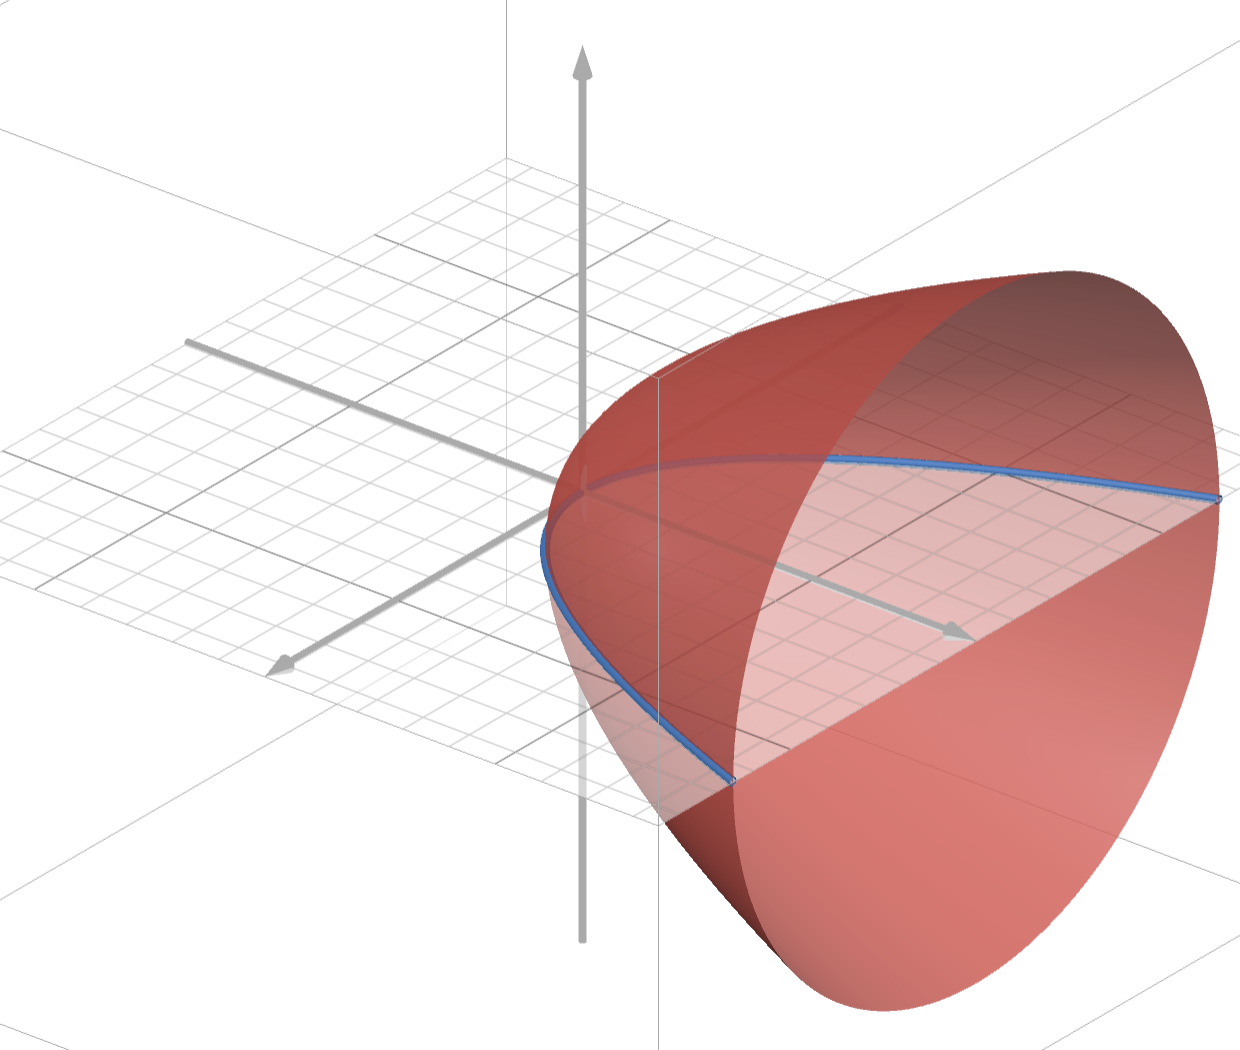

In the cells below, copy your code for **Q5** and **Q13**. Try out different learning rates and and numbers of iterations. Observe what happens to the loss plot in each case.

In [ ]:
### COPY Q5 CODE HERE

In [ ]:
### COPY Q13 CODE HERE

Based on what you've obsevered above and in the previous questions, why might you choose the Normal distribution or the Laplace distribution for linear regression? What effect does the learning rate have (what happens if it's set too high or too low)?

**YOUR ANSWER HERE**